<a href="https://colab.research.google.com/github/SUDHARSSHINI/Drone/blob/main/water_availability_test_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers pillow matplotlib requests


All TF 2.0 model weights were used when initializing ViTForImageClassification.

All the weights of ViTForImageClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use ViTForImageClassification for predictions without further training.


Label: Top, Score: 0.1500323861837387
Label: Tank, Score: 0.14178019762039185
Label: Dress, Score: 0.11311862617731094
Label: Shorts, Score: 0.0769028440117836
Label: Skirt, Score: 0.0682196393609047


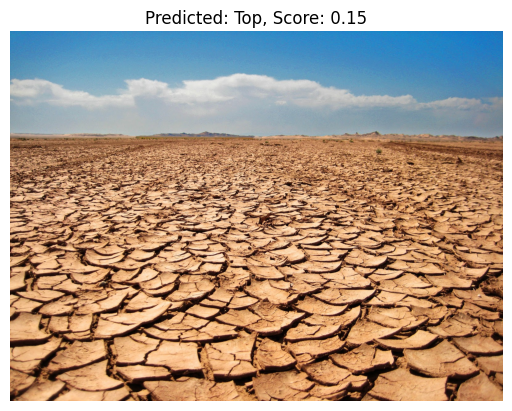

The land need water.


In [7]:
from PIL import Image
import requests
from io import BytesIO
from transformers import AutoFeatureExtractor, AutoModelForImageClassification, pipeline
import matplotlib.pyplot as plt

# Load pre-trained model and feature extractor with TensorFlow weights
model_name = "aalonso-developer/vit-base-patch16-224-in21k-clothing-classifier"
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name, from_tf=True)

# Create an image classification pipeline
pipe = pipeline("image-classification", model=model, feature_extractor=feature_extractor)

# Function to load an image
def load_image(image_path):
    if image_path.startswith('http'):
        response = requests.get(image_path)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(image_path)
    return img

# Example usage: Replace with your image path or URL
image_path = "/content/img_5.jpg"  # Update to your image file
image = load_image(image_path)

# Predict
results = pipe(image)

# Print results
for result in results:
    print(f"Label: {result['label']}, Score: {result['score']}")

# Show the image with prediction
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.title(f"Predicted: {results[0]['label']}, Score: {results[0]['score']:.2f}")
plt.show()


def needs_water(prediction_label):
    # Example conditions
    if prediction_label.lower() in ["dry", "arid", "parched"]:
        return "The land doesn't need water."
    else:
        return "The land need water."



# Example label from results (change according to your model's labels)
predicted_label = results[0]['label']
print(needs_water(predicted_label))
